My project began with an ambitious thought: Fire incidents involving more than one person would
have an exponentially increased likelihood of online documentation. This thesis was tested by
parsing an unaltered government data file involving fire responses from data.louisville.gov, 
isolating incidents with multiple injuries, and concatenating a Google search to seek an
accompanying news report.

The results of that idea are within. Please make sure you have installed pandas and matplotlib,
and that you have cloned the repository to have the assets/fireInjuries.csv available. The
googleSearches.csv is the result file, written when the program runs. This is the jupyter
notebook version, and can also be ran as the python file with the same filename.

Begin by importing the aforementioned modules for Dataframe calculations and visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Uses formatted date to encode a Google search hyperlink in an Excel-friendly CSV format

In [2]:
def googler(date):
    return ('=HYPERLINK("https://www.google.com/search?q=' + str(date) + '+fire+Louisville")\n')

Visualizer plotting injury count over injury dates, as well as amount of incidents per
multitude of injuries, setting up labels and creating two visualizations as required (4)

In [3]:
def visualizer(x, y):
    plt.plot(x, y, marker = "^", linestyle = "None")
    plt.xlabel("Date of Incident, in chronological order")
    plt.ylabel("Fire Injuries per Incident")
    plt.title("Documented Fire Incidents in Louisville, Kentucky from 2005 to 2016")
    plt.grid(True)
    plt.show()

    plt.hist(y)
    plt.xlabel("Amount of Fire Injuries per Incident")
    plt.ylabel("Number of Incidents per Amount")
    plt.title("Documented Fire Incidents in Louisville, Kentucky from 2005 to 2016")
    plt.show()

Reads in CSV (1), converts injuryDate to datetime (2), concatenates dates for Google searches,
converts the datetime into string, and writes into the googleSearches.csv file, only selecting
incidents involving more than one fire injury (3), finishing by calling upon the visualizations

In [4]:
def main():
    df = pd.read_csv("assets/fireInjuries.csv")
    injuryDate = pd.to_datetime(df["Injury_Date"], errors = "coerce")
    totalInjuries = df["Total_Injuries"]
    searches = open("googleSearches.csv", "w")
    count = 0
    for line in injuryDate:
        if df["Total_Injuries"][count] > 1:
            searches.writelines(googler(line.strftime("%Y-%m-%d")))
        count += 1
    searches.close()

    visualizer(injuryDate, totalInjuries)

Calls the main program into existence

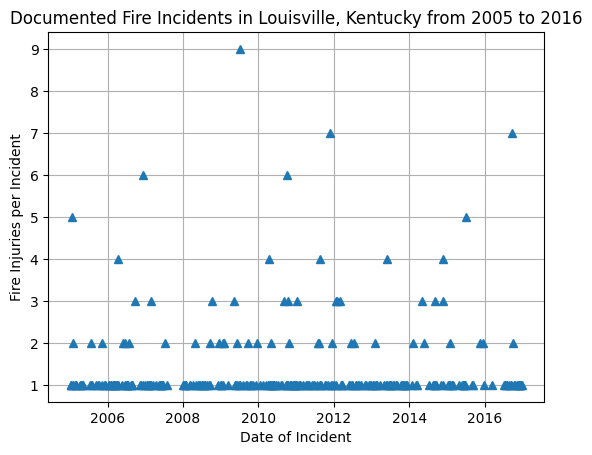

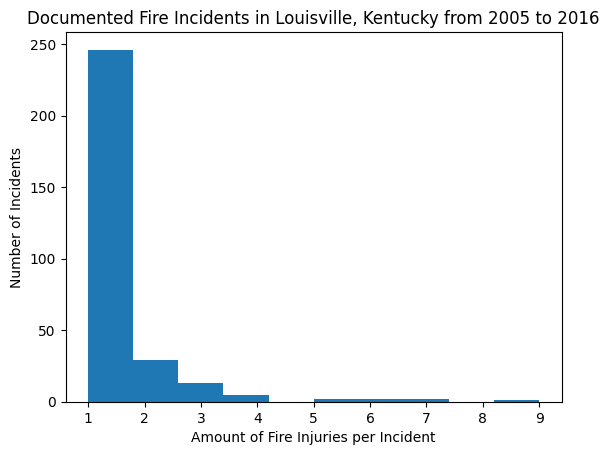

In [5]:
main()

The visualizations offer a touch of insight into the 300 datapoints at hand. The bulk of the
incidents were solo affairs. Fire spreads, but thankfully, the likelihood of fire injury does not. 

Despite my initial presumptions about high incidents in July - as the first full
month of summer, with weeks of fireworks surrounding - the data did not reflect that. The coldest 
months introduced an increased risk with heating elements.

Another interesting datapoint came from the absence of one: my research uniquely lacked an
incident involving two or more fire injuries in the month of March.

The most important truth I learned was that my modest assumptions about news archives and record
keeping were extremely overambitious. What I thought was naturally journalistic, revealed itself
as something that most certainly isn't considered newsworthy.

While I did not find the consistency that I expected to see, I gained invaluable skills and
experience in analyzing and visualizing data. I aimed for 45 percent, and arrived at 12.9%, but
the path to this point was wholly rewarding.

This interpretation of results concludes my project (5). Thank you for your time.